<a href="https://colab.research.google.com/github/ddenebb/visualitzacio_exploratoria/blob/main/Tasca_M4_T01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using the data visualization libraries Matplotlib or Seaborn, complete the following exercises.

 REMEMBER

In data science one of the most important tasks is analysis. A graphic must always be accompanied by an explanation of it. It provides information.


# Exercise 1
Download the attached dataset rent price by quarter and neighborhood.csv extracted from the OpenDataBCN website and summarize it statistically and graphically.

Create at least one view for:

A categorical variable (District or Neighborhood)
A numeric variable (Price)
A numerical variable and a categorical one (District and Price)
Two numeric variables (Year or Quarter and Price)
Three variables (Neighbourhood or District, Quarter and Price)

In [187]:
from google.colab import drive
drive.mount('/content/drive')
images_dir = '/content/gdrive/My Drive/Images'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import library needed and set path for reading dataset from Google Drive. Then have a first look at the dataset and print info in order to see data types

In [188]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import seaborn as sns


path = "/content/drive/MyDrive/Google Colab DS IT Academy/Sprint 4/data/preu lloguer per trimestre i barri.csv"
df = pd.read_csv(path)
print(df.info(memory_usage='deep'))
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Any             584 non-null    int64 
 1   Trimestre       584 non-null    int64 
 2   Codi_Districte  584 non-null    int64 
 3   Nom_Districte   584 non-null    object
 4   Codi_Barri      584 non-null    int64 
 5   Nom_Barri       584 non-null    object
 6   Lloguer_mitja   584 non-null    object
 7   Preu            584 non-null    object
dtypes: int64(4), object(4)
memory usage: 213.3 KB
None


,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
0,2021,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),759.2
1,2021,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà mensual (Euros/mes),929.6
2,2021,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà mensual (Euros/mes),808.9
3,2021,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà mensual (Euros/mes),879.4
4,2021,1,2,Eixample,5,el Fort Pienc,Lloguer mitjà mensual (Euros/mes),918.0
...,...,...,...,...,...,...,...,...
579,2021,4,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,Lloguer mitjà per superfície (Euros/m2 mes),15.2
580,2021,4,10,Sant Martí,70,el Besòs i el Maresme,Lloguer mitjà per superfície (Euros/m2 mes),10.8
581,2021,4,10,Sant Martí,71,Provençals del Poblenou,Lloguer mitjà per superfície (Euros/m2 mes),13.8
582,2021,4,10,Sant Martí,72,Sant Martí de Provençals,Lloguer mitjà per superfície (Euros/m2 mes),11.7


Using unique method we can see any distinct value columns have

In [189]:
df.Any.unique()

array([2021])

In [190]:
df.Trimestre.unique()

array([1, 2, 3, 4])

In [191]:
df.Codi_Districte.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [192]:
df.Nom_Districte.unique()

array(['Ciutat Vella', 'Eixample', 'Sants-Montjuïc', 'Les Corts',
       'Sarrià-Sant Gervasi', 'Gràcia', 'Horta-Guinardó', 'Nou Barris',
       'Sant Andreu', 'Sant Martí'], dtype=object)

In [193]:
df.Codi_Barri.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73])

In [194]:
df.Nom_Barri.unique()

array(['el Raval', 'el Barri Gòtic', 'la Barceloneta',
       'Sant Pere, Santa Caterina i la Ribera', 'el Fort Pienc',
       'la Sagrada Família', "la Dreta de l'Eixample",
       "l'Antiga Esquerra de l'Eixample",
       "la Nova Esquerra de l'Eixample", 'Sant Antoni', 'el Poble Sec',
       'la Marina del Prat Vermell', 'la Marina de Port',
       'la Font de la Guatlla', 'Hostafrancs', 'la Bordeta',
       'Sants - Badal', 'Sants', 'les Corts',
       'la Maternitat i Sant Ramon', 'Pedralbes',
       'Vallvidrera, el Tibidabo i les Planes', 'Sarrià',
       'les Tres Torres', 'Sant Gervasi - la Bonanova',
       'Sant Gervasi - Galvany', 'el Putxet i el Farró',
       'Vallcarca i els Penitents', 'el Coll', 'la Salut',
       'la Vila de Gràcia', "el Camp d'en Grassot i Gràcia Nova",
       'el Baix Guinardó', 'Can Baró', 'el Guinardó',
       "la Font d'en Fargues", 'el Carmel', 'la Teixonera',
       'Sant Genís dels Agudells', 'Montbau', "la Vall d'Hebron",
       'la Clota', '

In [195]:
df.Lloguer_mitja.unique()

array(['Lloguer mitjà mensual (Euros/mes)',
       'Lloguer mitjà per superfície (Euros/m2 mes)'], dtype=object)

After a first look it can be seen that data refers to year 2021 separating it in four quarters. Includes name (as an object) and code (float type) of each of the 10 town´s districts as well as name (object) and code (float) for each of the existing 73 neighboorhoods. There is a column describing the mean rent price (as an object), but it is represented in two different ways: by €/month and by €/square meter. This has to be taken into account when analyzing and visualizing the data shown in the price column. This variable is represented in € and is an object that will need to be converted to float in order to make calculations.

Now let´s analyze how the sample is seeing haw many records per district/ neighborhood there are:

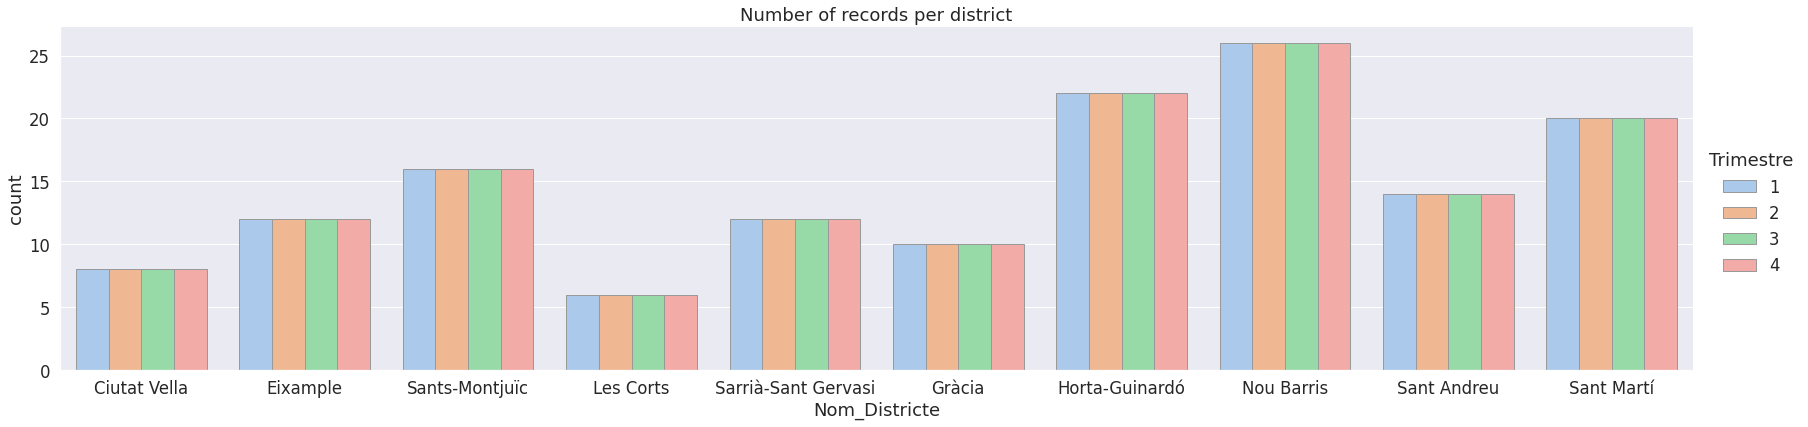

In [196]:
sns.set(font_scale = 1.5)
sns.catplot(x="Nom_Districte", kind="count", hue= "Trimestre",
            palette="pastel", edgecolor=".6", height = 6, aspect = 4,
            data=df).set(title="Number of records per district");
plt.savefig('Number of records per district.png')


It can be seen that for some districts the number of records is much higher (more than 100 for Nou Barris) while for others is smaller (Les Corts with just over 20). If the number of records is plotted by neighborhood is clear that there is one record per quarter for each, meanning that some districts have more neighborhoods than others.

In order to see how many nighborhoods and records there are, a plot will be shown:

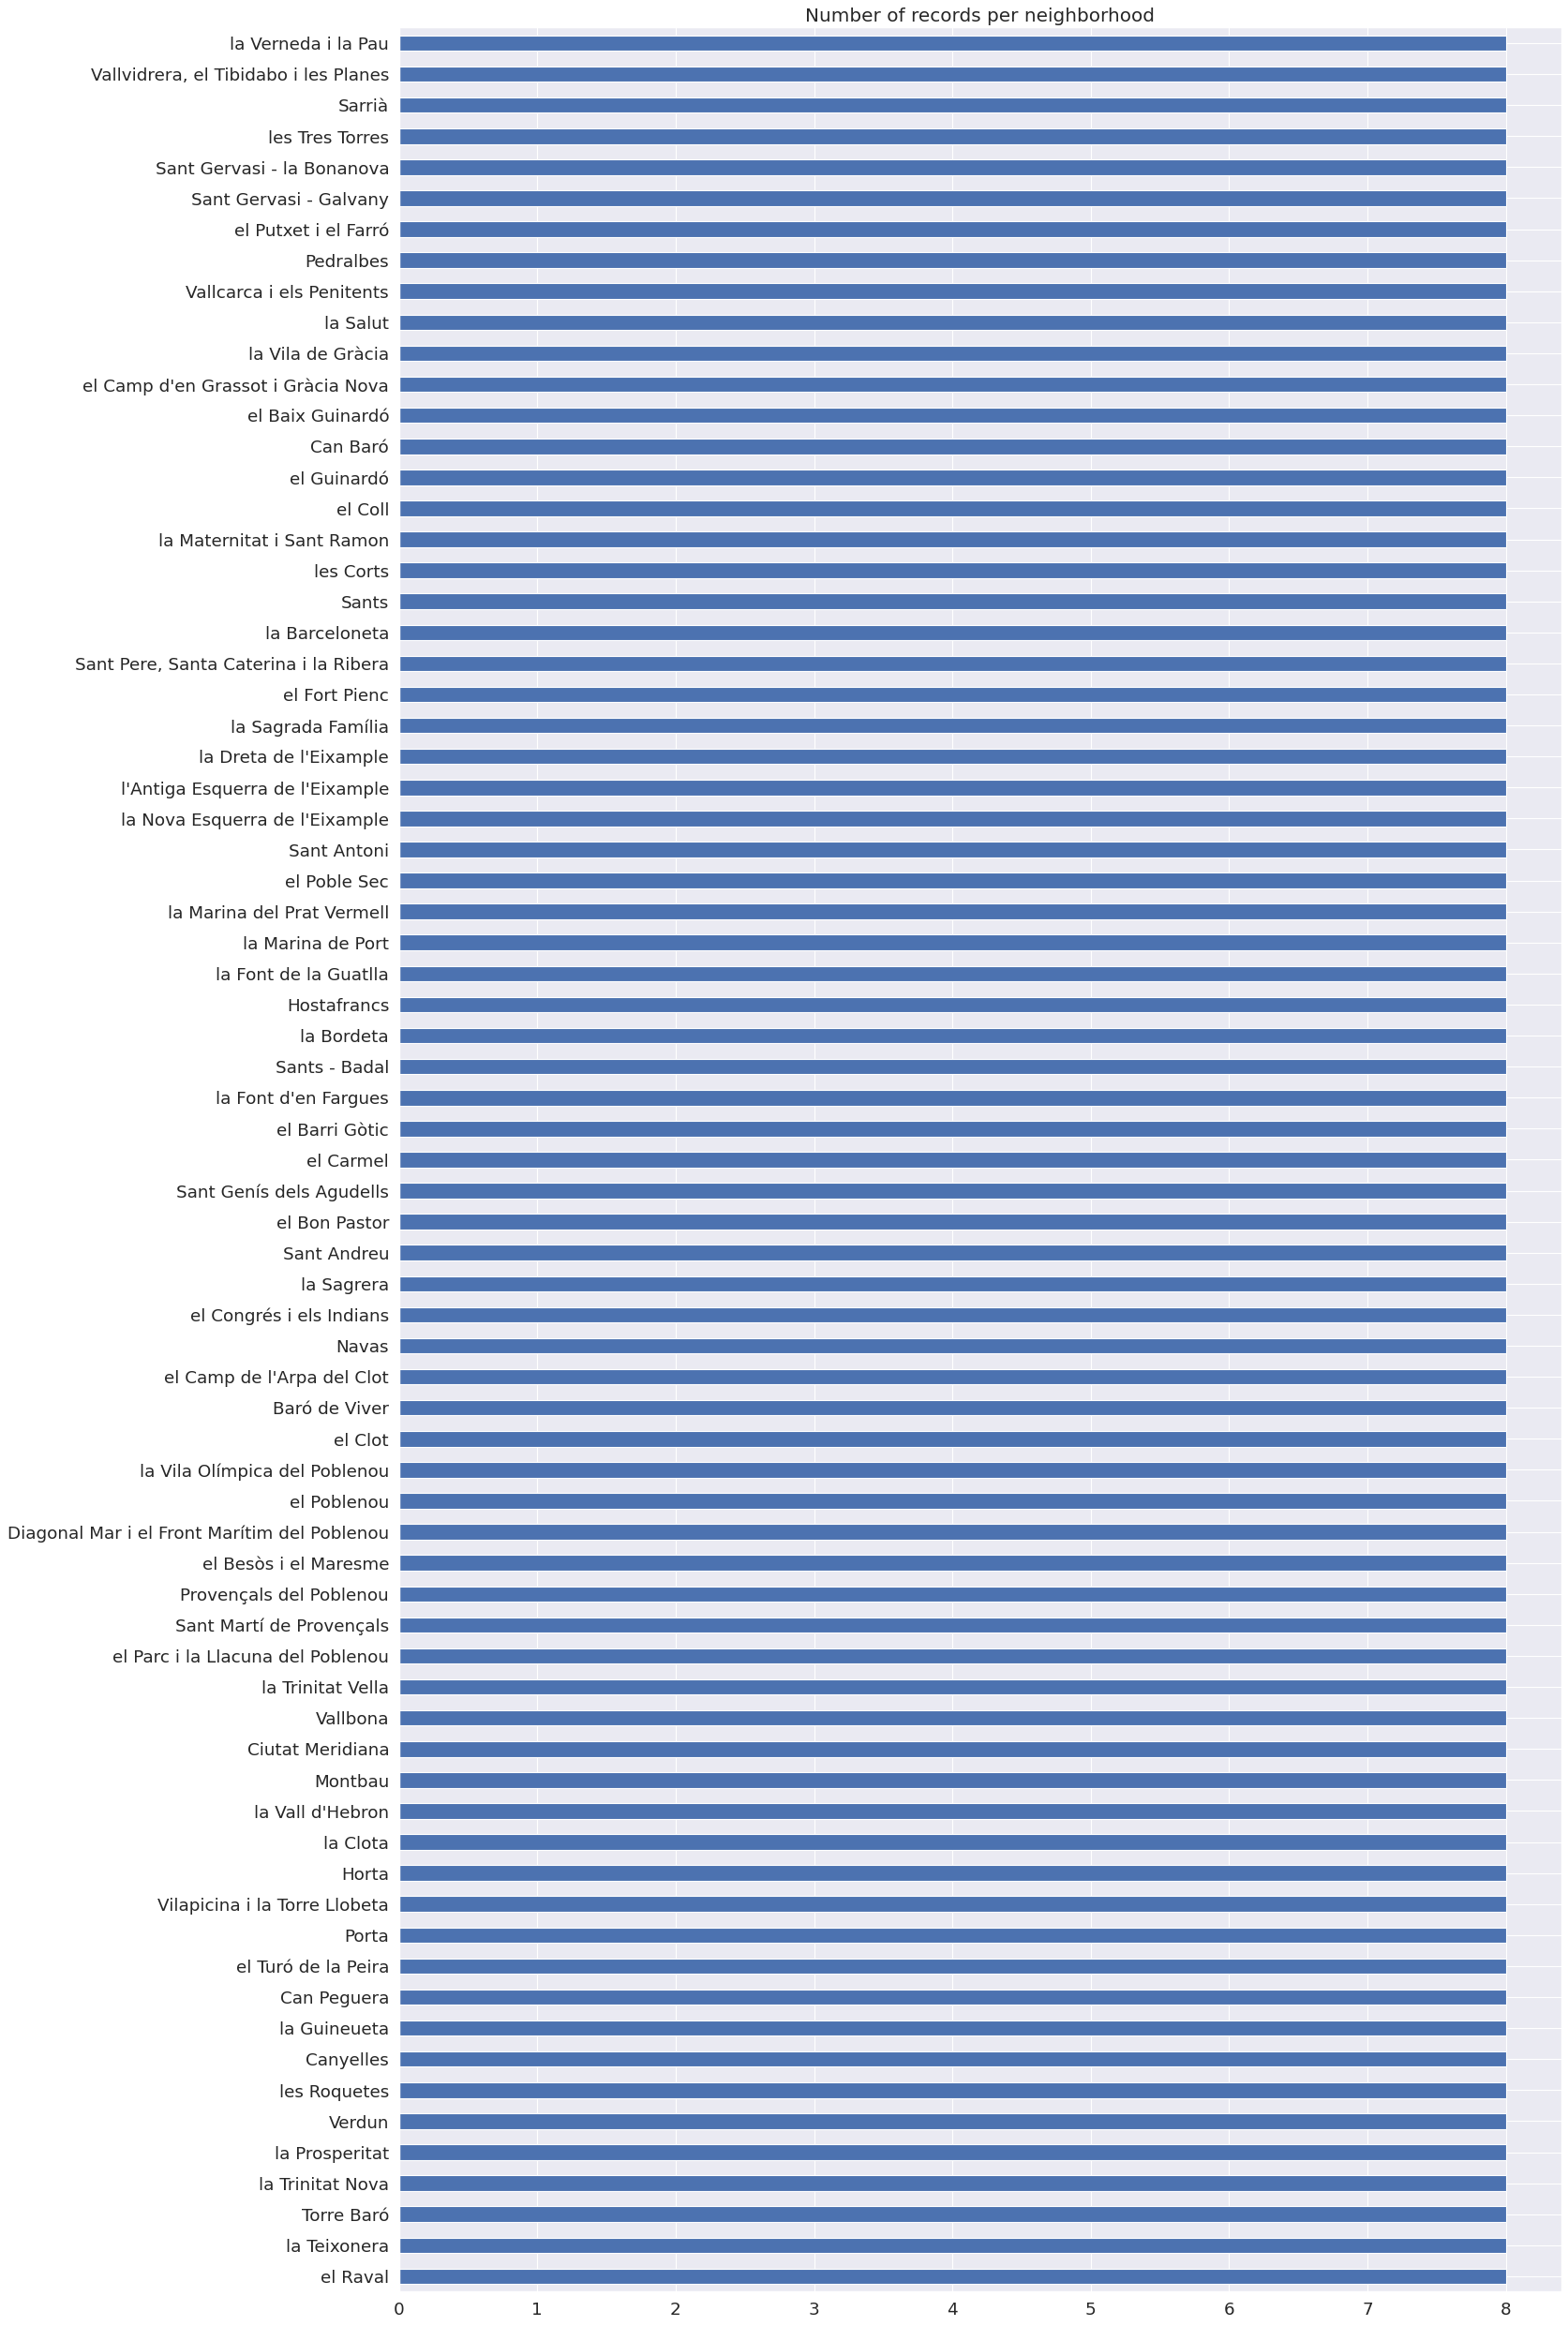

In [197]:
from matplotlib.pyplot import figure
neighborhood_records_count =df['Nom_Barri'].value_counts()
figure(figsize=(20, 40), dpi=80)
neighborhood_records_count.plot(kind='barh', title='Number of records per neighborhood',)
plt.savefig('Number of records per neighborhood.png')

 It can be seen that there are 8 records for each of the 73 neighborhoods:  two records per each trimester, one for avg rent price and another for for avg rent price per square meter.

'Preu' column representing rent price as an object must be converted to float in order to carry out statistical operations like average, median, etc.

In [198]:
# convert "Preu" (price) to float
df['Preu'][df['Preu'] == '--'] = None
df['Preu'] = df['Preu'].astype(float)
df['Preu']
#df1[["Preu"]].describe()

<ipython-input-198-2a89f9fe1015>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Preu'][df['Preu'] == '--'] = None


0      759.2
1      929.6
2      808.9
3      879.4
4      918.0
       ...  
579     15.2
580     10.8
581     13.8
582     11.7
583     11.3
Name: Preu, Length: 584, dtype: float64

As the avg rent price is represented in two diferent ways, the column 'Lloguer_mitja' (avg rent) will be filtered by "Lloguer mitjà mensual (Euros/mes)" and then show a boxplot to see how the avg rent prices are distributed by district.

In [199]:
avg_rent_yearly=df[(df.Lloguer_mitja == 'Lloguer mitjà mensual (Euros/mes)')]

This plot shows prices distribution (in €/mes) for the whole town for the whole year:

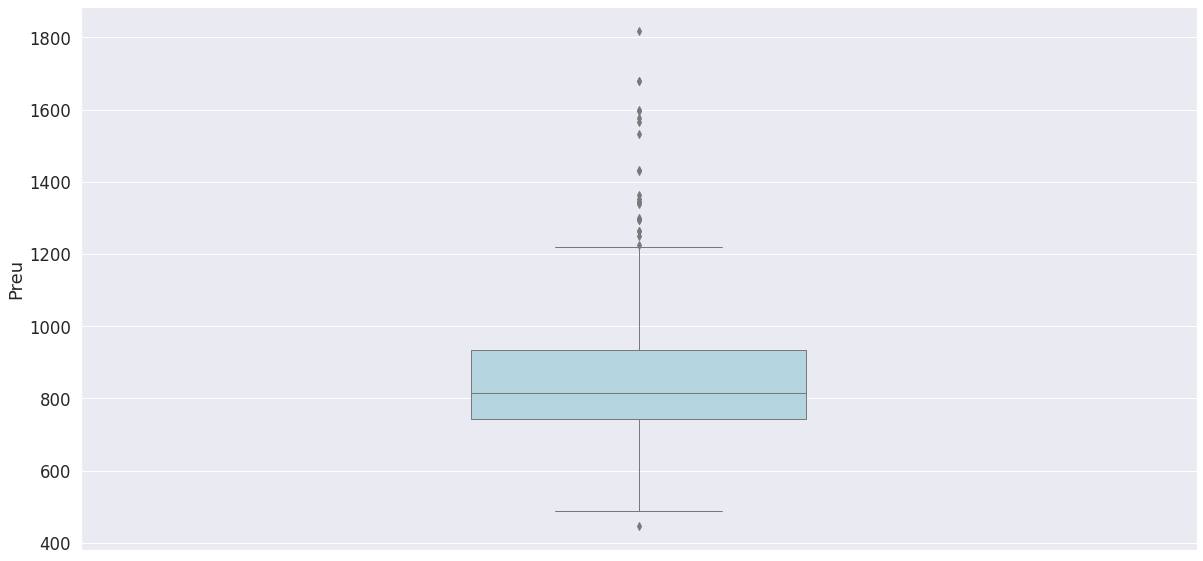

In [200]:
sns.boxplot(y="Preu", data=avg_rent_yearly,  color='lightblue', fliersize=5,  orient='v', linewidth=1 , width=0.3,);
sns.set(rc={'figure.figsize':(14,12)})
plt.savefig('Rent prices distribution (in € monthly) Barcelona 2021.png')

This plot shows prices distribution (in €/mes) for the whole town, this time showing it by quarter:

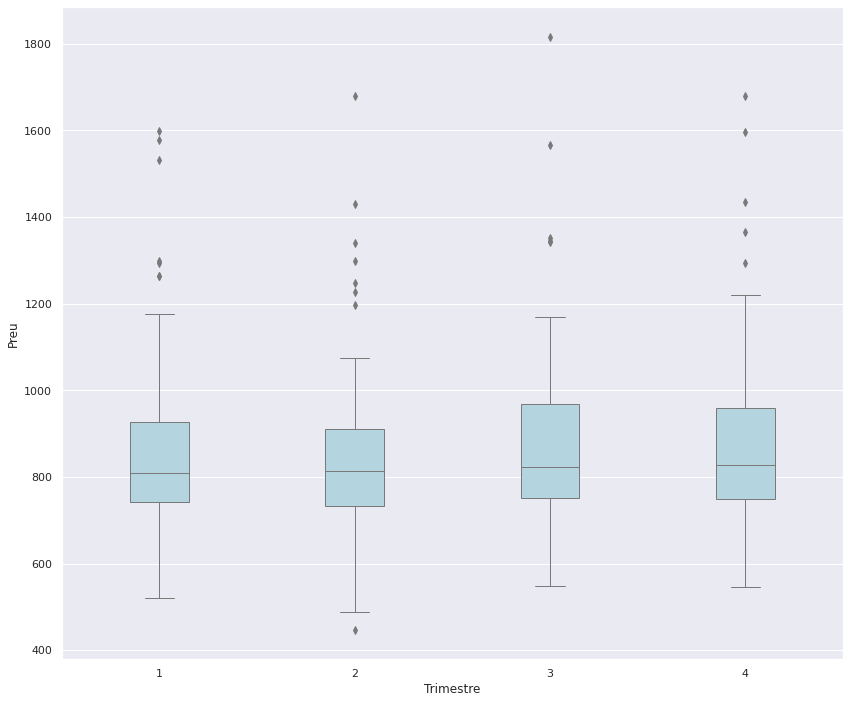

In [201]:
sns.boxplot(x="Trimestre", y="Preu", data=avg_rent_yearly,  color='lightblue', fliersize=5,  orient='v', linewidth=1 , width=0.3,);
sns.set(rc={'figure.figsize':(14,12)})
plt.savefig('Rent prices distribution (in € monthly) Barcelona by quarters.png')

Now let's plot prices distribution (in €/mes) by district and quarter::

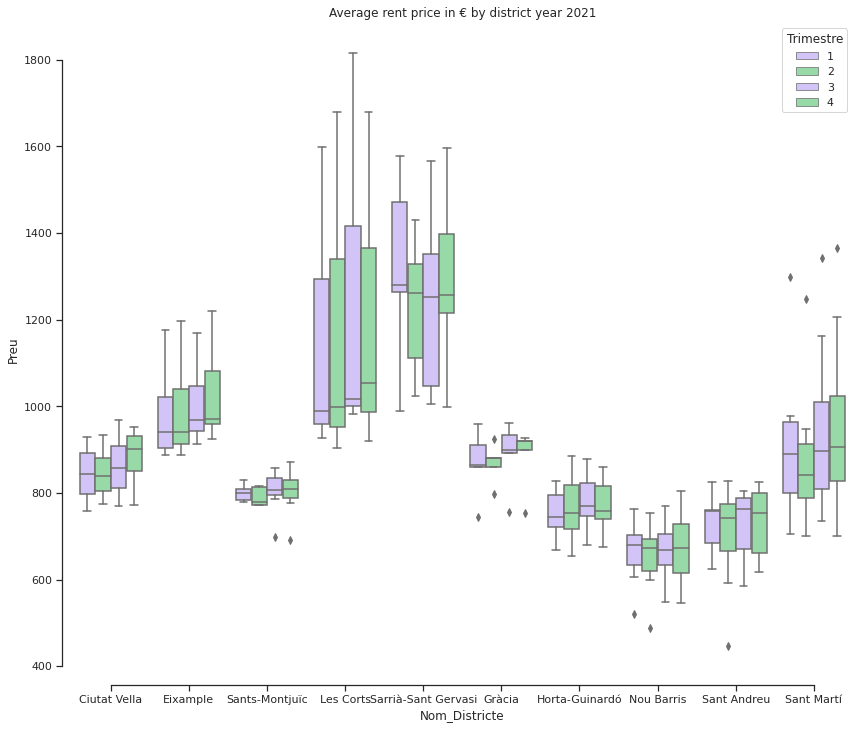

In [202]:
sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(x='Nom_Districte', y ="Preu", hue = 'Trimestre', palette=["m", "g"],
            data=avg_rent_yearly).set(title="Average rent price in € by district year 2021");
sns.set(rc={'figure.figsize':(10,20)})
sns.despine(offset=10, trim=True)
plt.savefig('Average rent price in € by district year 2021.png')

Now we filter the column 'Lloguer_mitja' (avg rent) by "Lloguer mitjà per superfície (Euros/m2 mes)" and then show a boxplot to see how the avg rent prices by sq meter are distributed.


In [203]:
avg_rent_yearly_by_sup=df[(df.Lloguer_mitja == 'Lloguer mitjà per superfície (Euros/m2 mes)')]

This plot shows prices distribution by area (in €/m2 per month)  for the whole town:

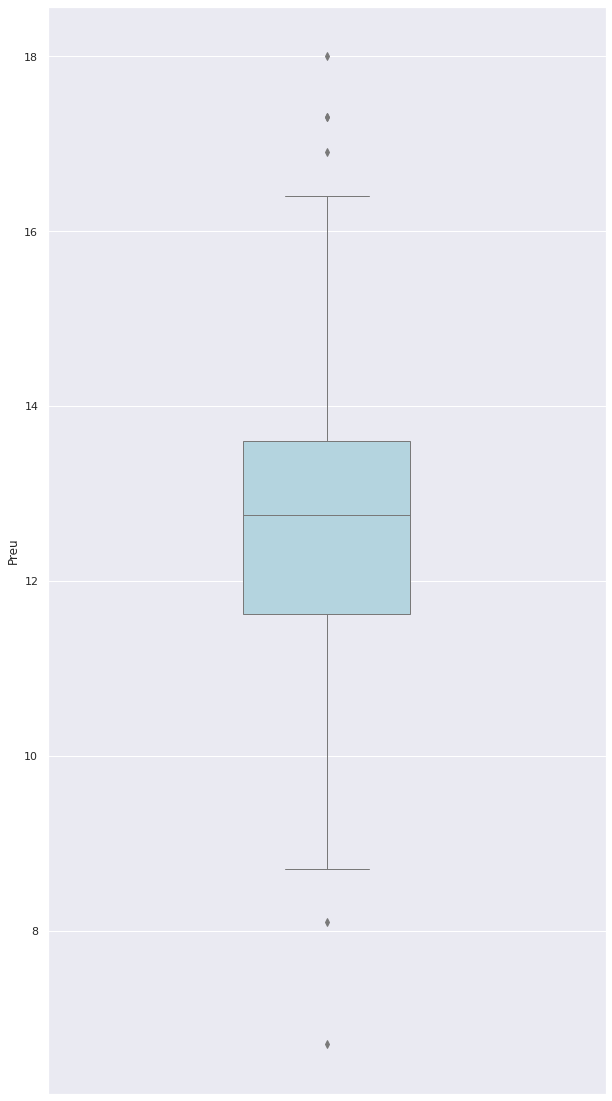

In [204]:
sns.boxplot(y="Preu", data=avg_rent_yearly_by_sup,  color='lightblue', fliersize=5,  orient='v', linewidth=1 , width=0.3,);
sns.set(rc={'figure.figsize':(14,12)})
plt.savefig('Rent prices distribution (in € per sq meter monthly) Barcelona 2021.png')

This plot shows prices distribution by area (in €/m2 per month) for the whole town, this time showing it by quarter:

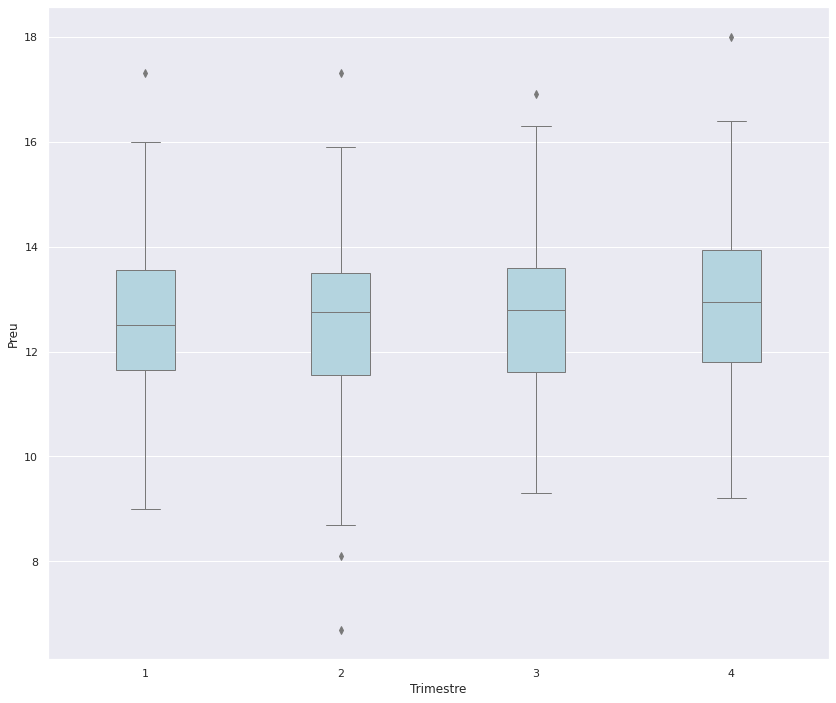

In [205]:
sns.boxplot(x="Trimestre", y="Preu", data=avg_rent_yearly_by_sup,  color='lightblue', fliersize=5,  orient='v', linewidth=1 , width=0.3,);
sns.set(rc={'figure.figsize':(14,12)})
plt.savefig('Rent prices distribution (in € per sq meter monthly) Barcelona by quarters.png')


This plot shows prices distribution by area (in €/m2 per month) by district and quarter:



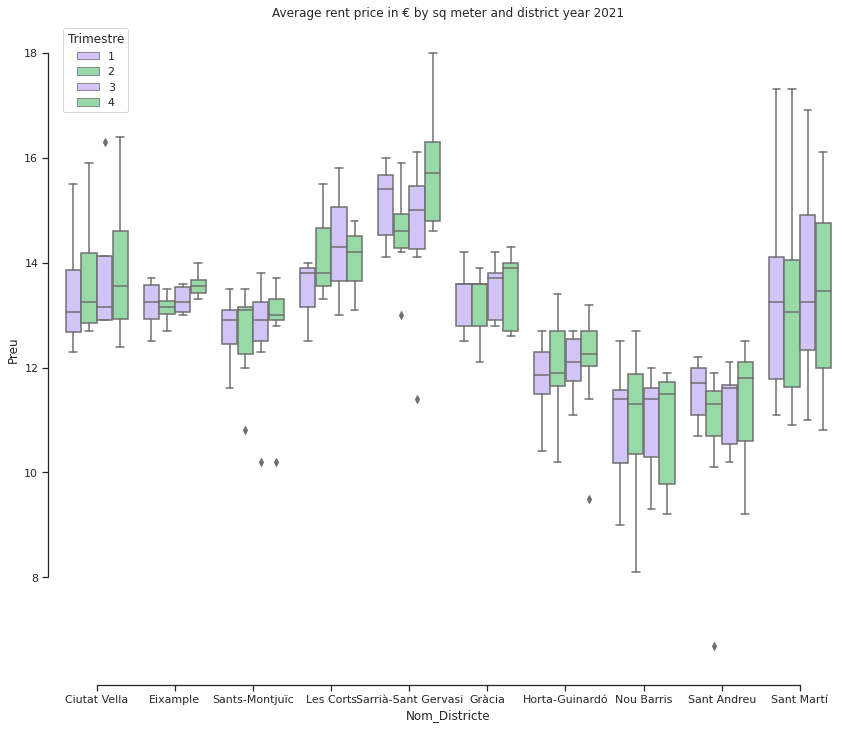

In [206]:
sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(x='Nom_Districte', y ="Preu", hue = 'Trimestre', palette=["m", "g"],
            data=avg_rent_yearly_by_sup).set(title="Average rent price in € by sq meter and district year 2021");
sns.set(rc={'figure.figsize':(10,20)})
sns.despine(offset=10, trim=True)
plt.savefig('Average rent price in € by sq meter and district quarterly 2021.png')

 it can be seen that some of them have prices packed in a small range (like 'Sants-Montjuïc') while others have values over a wide range (like 'Sarriá Sant Gervasi' or 'Sant Martí'). A special case is 'Les Corts' which has two neighborhoods in a range and another neighborhood nearly doubling the prices. This suggests an analysis and plot of the neighborhoods to see what´s going on, as it seems to be a big difference of price depending on the time of the year as well.

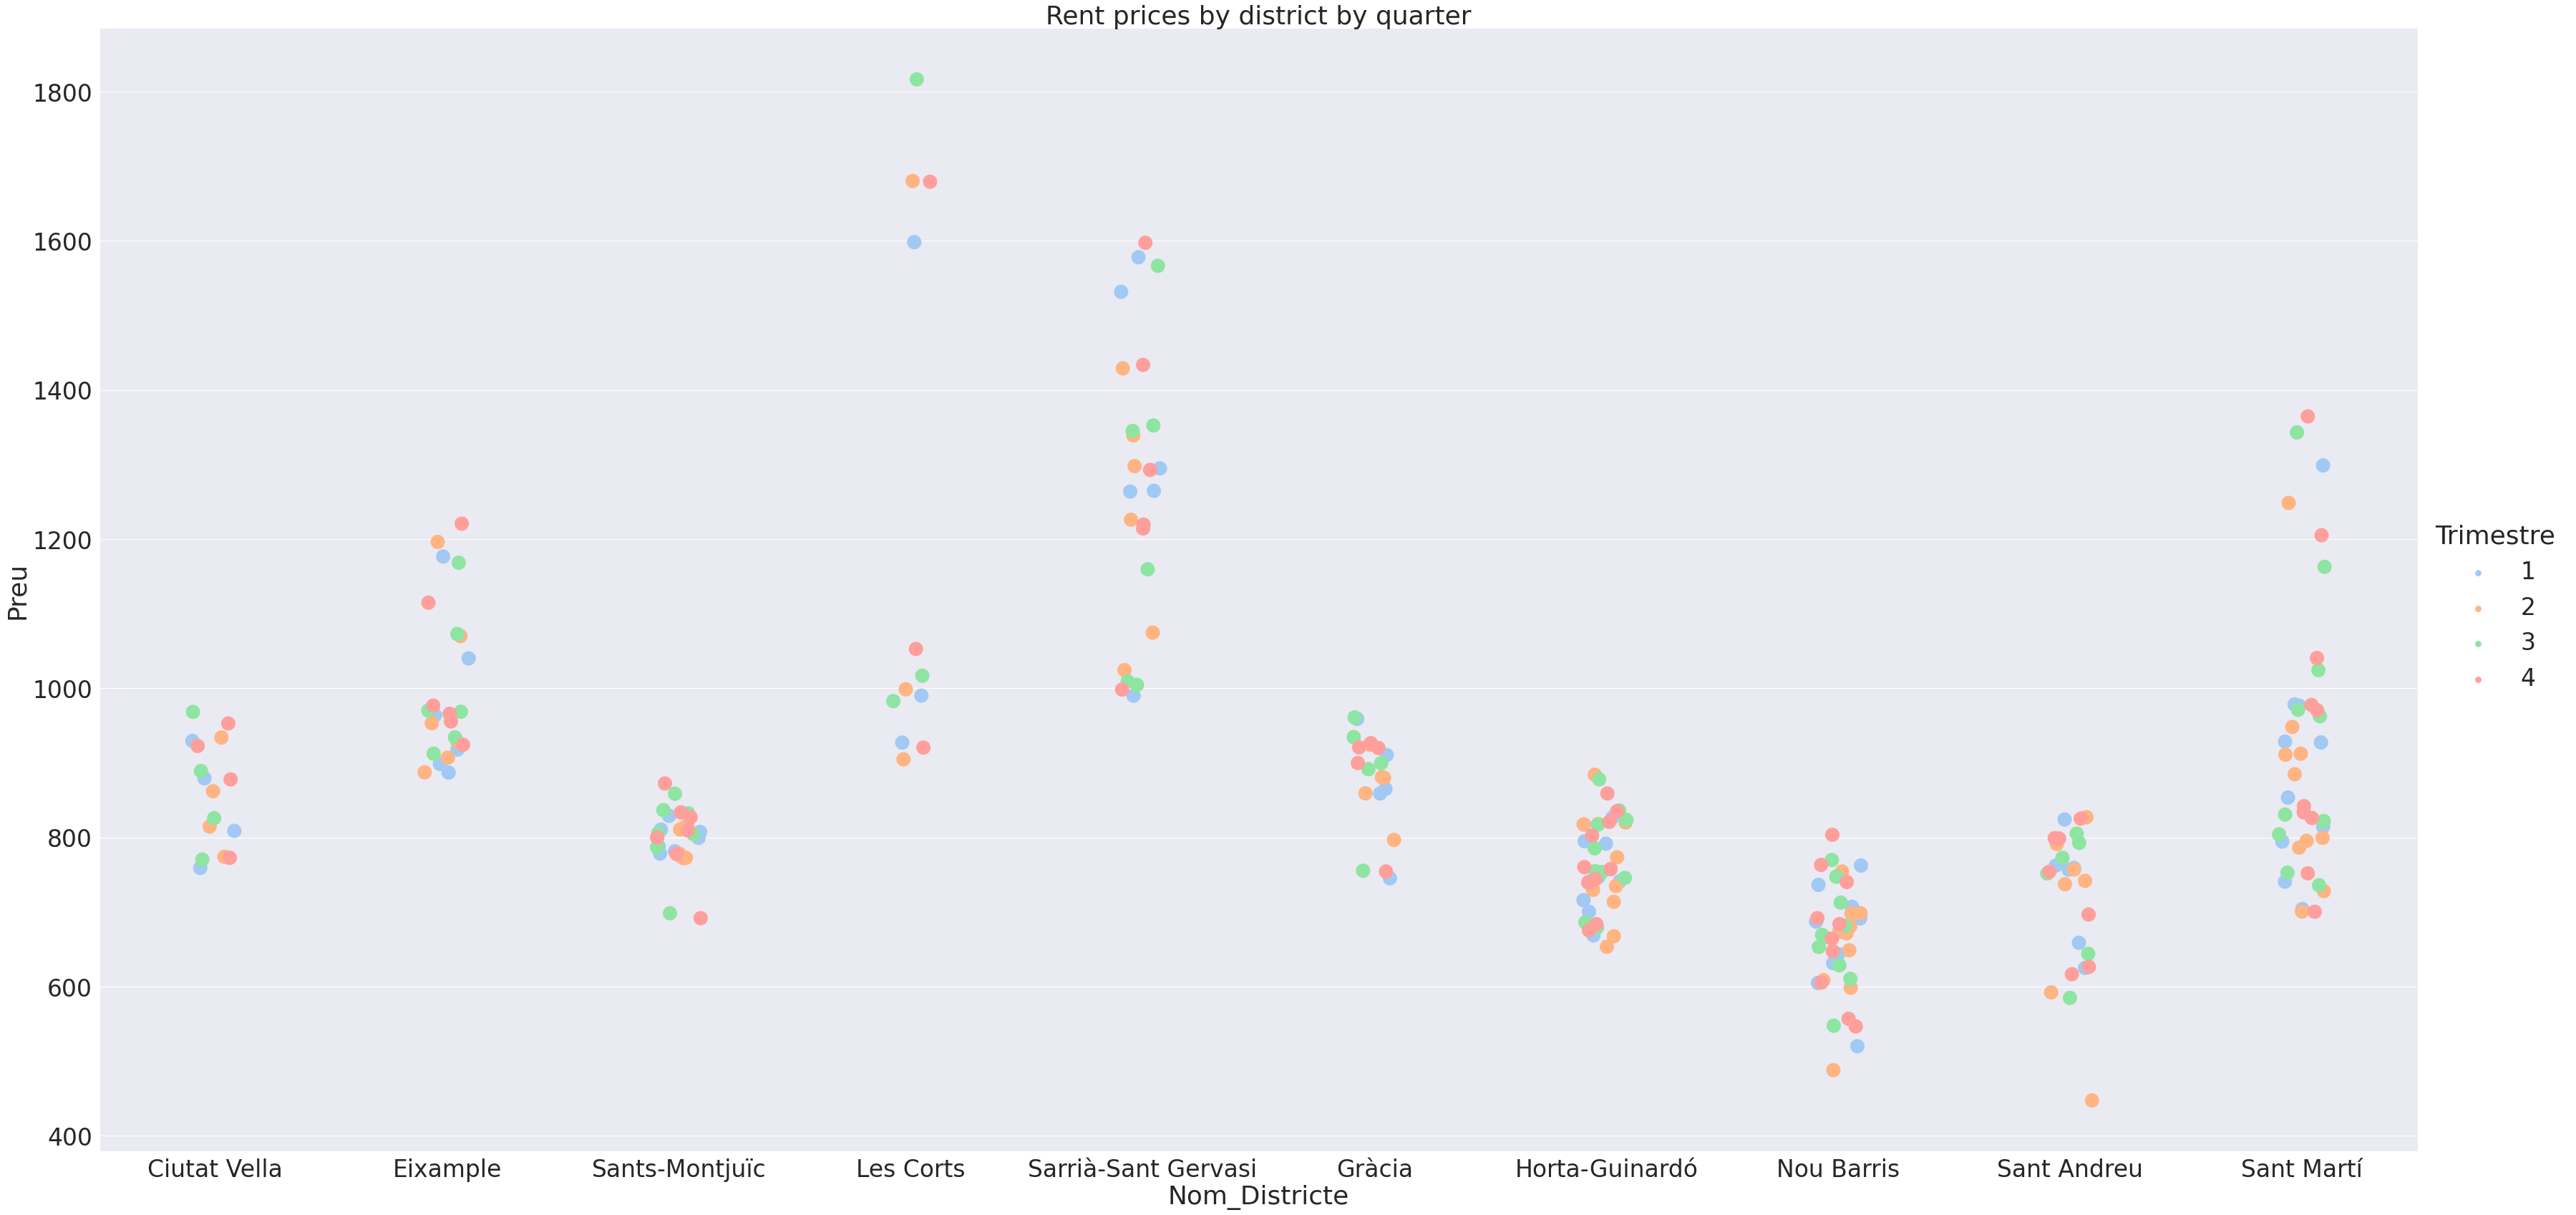

In [207]:
sns.set(font_scale = 3)
sns.catplot(x="Nom_Districte", y ="Preu", hue= 'Trimestre',
            palette="pastel", edgecolor=".6", height = 24, aspect = 2,
            data=avg_rent_yearly,s=20).set(title="Rent prices by district by quarter");
plt.savefig('Rent prices by district by quarter.png')

This plot shows prices by neighborhood, it can be seen that some of them have prices very similar over the year (like "El Raval" with code 1) while othrs  have very disimilar over the four quarters of the year (like "Pedralbes" wihich seems to be the most expensive in town with code 21 and about 200 € difference between 1st and 3rd quarters).

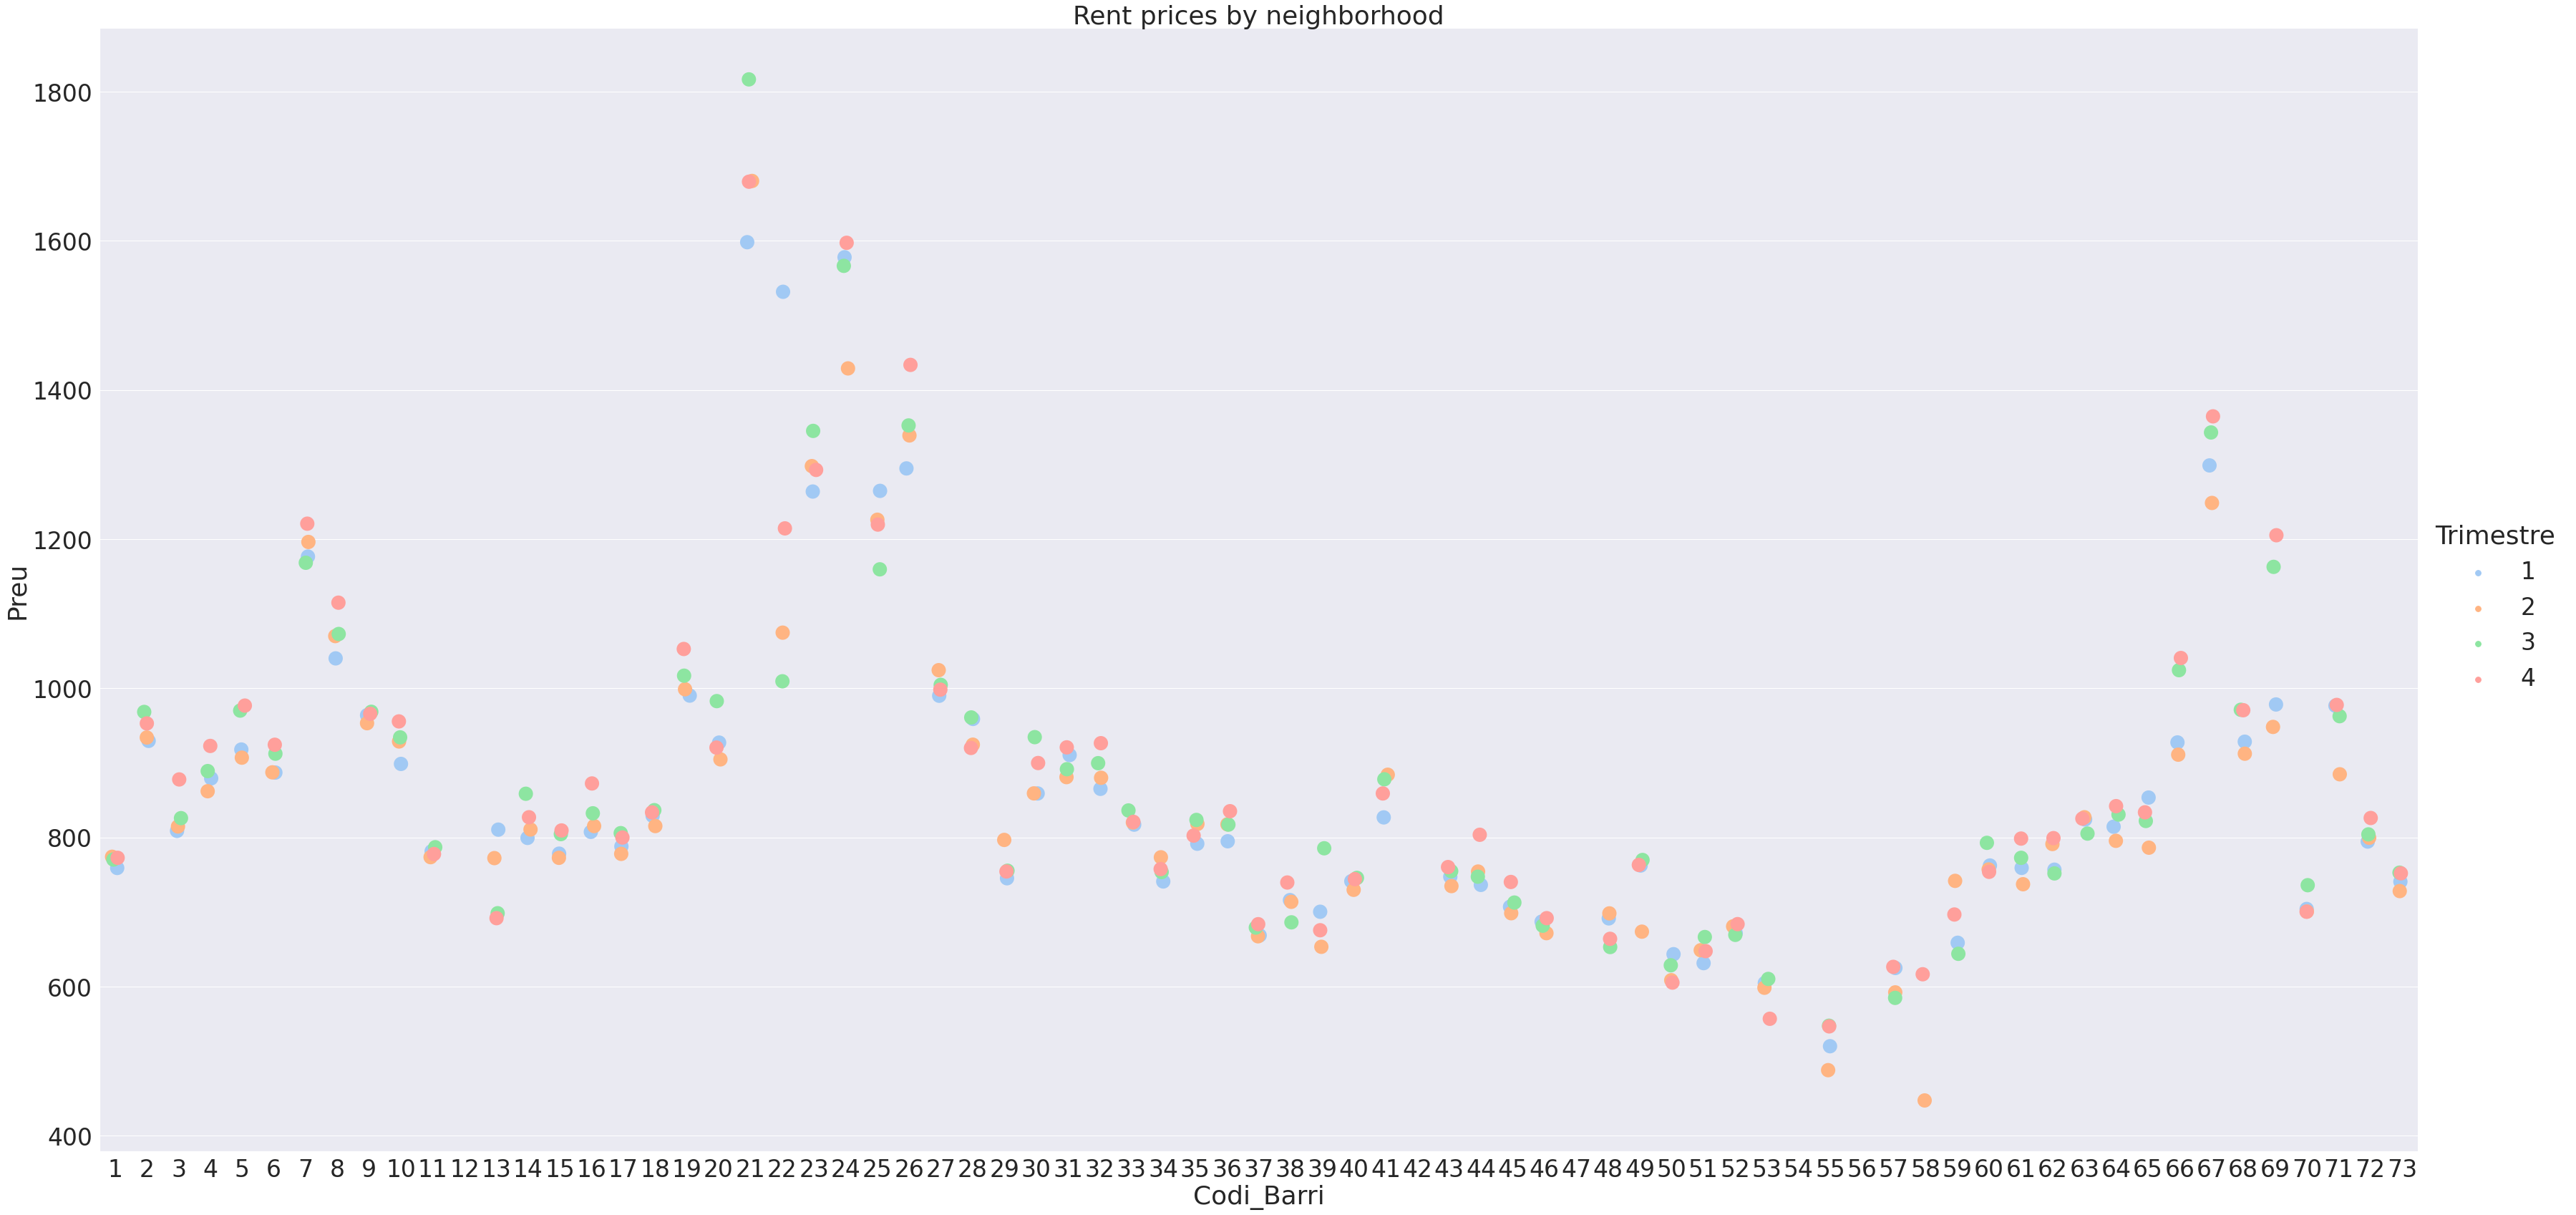

In [208]:
sns.set(font_scale = 3)
sns.catplot(x="Codi_Barri", y ="Preu", hue= 'Trimestre',
            palette="pastel", edgecolor=".6", height = 24, aspect = 2,
            data=avg_rent_yearly,s=20).set(title="Rent prices by neighborhood");
plt.savefig('Rent prices by neighborhood.png')

Next graphic shows the distribution by neighborhood. It can be seen that most avg rent prices are between 750€ an 1000€, with a couple of outliers hovering the 1600€ mark

#Exercise 2

Export graphics as images or as HTML.

All graphics were exported as .png file when created

#Exercise 3

Suggest a visualization that you think might be interesting.

As the avg rent price is represented in two diferent ways, the column 'Lloguer_mitja' (avg rent) will be filtered by "Lloguer mitjà mensual (Euros/mes)" and quarter. Then group by district name and price to find the average price per district quarterly, in order to show as a horizontal barplot for each of the 4 quarters.

In [209]:
T1=df[(df.Lloguer_mitja == 'Lloguer mitjà mensual (Euros/mes)') & (df.Trimestre == 1)]
T2=df[(df.Lloguer_mitja == 'Lloguer mitjà mensual (Euros/mes)') & (df.Trimestre == 2)]
T3=df[(df.Lloguer_mitja == 'Lloguer mitjà mensual (Euros/mes)') & (df.Trimestre == 3)]
T4=df[(df.Lloguer_mitja == 'Lloguer mitjà mensual (Euros/mes)') & (df.Trimestre == 4)]

avg_price_T1 = T1.groupby('Nom_Districte')['Preu'].mean().sort_values(ascending=False)
avg_price_T2 = T2.groupby('Nom_Districte')['Preu'].mean().sort_values(ascending=False)
avg_price_T3 = T3.groupby('Nom_Districte')['Preu'].mean().sort_values(ascending=False)
avg_price_T4 = T4.groupby('Nom_Districte')['Preu'].mean().sort_values(ascending=False)


Plot the filtered variables

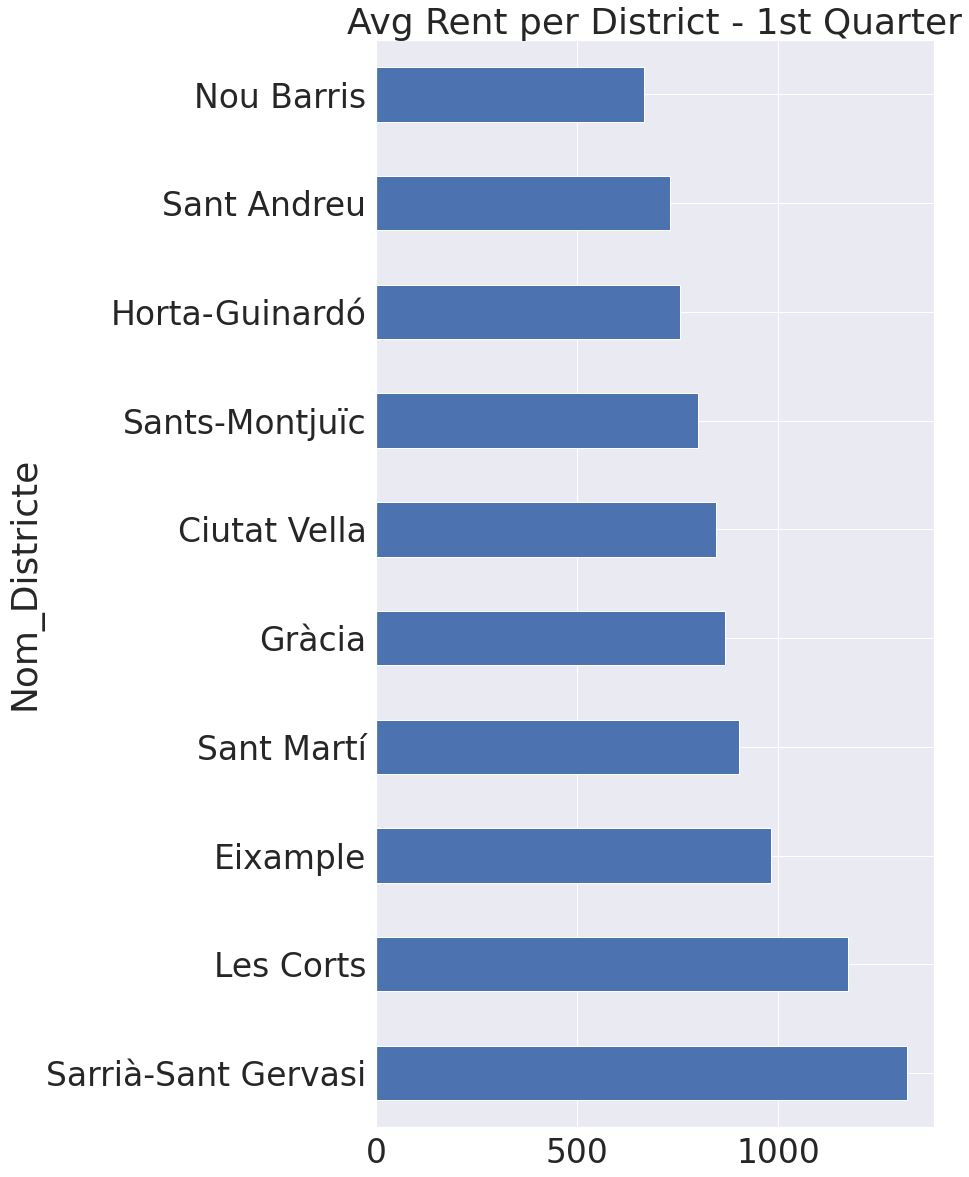

In [210]:
avg_price_T1=T1.groupby('Nom_Districte')['Preu'].mean().sort_values(ascending=False)
avg_price_T1.plot(kind='barh', title='Avg Rent per District - 1st Quarter')

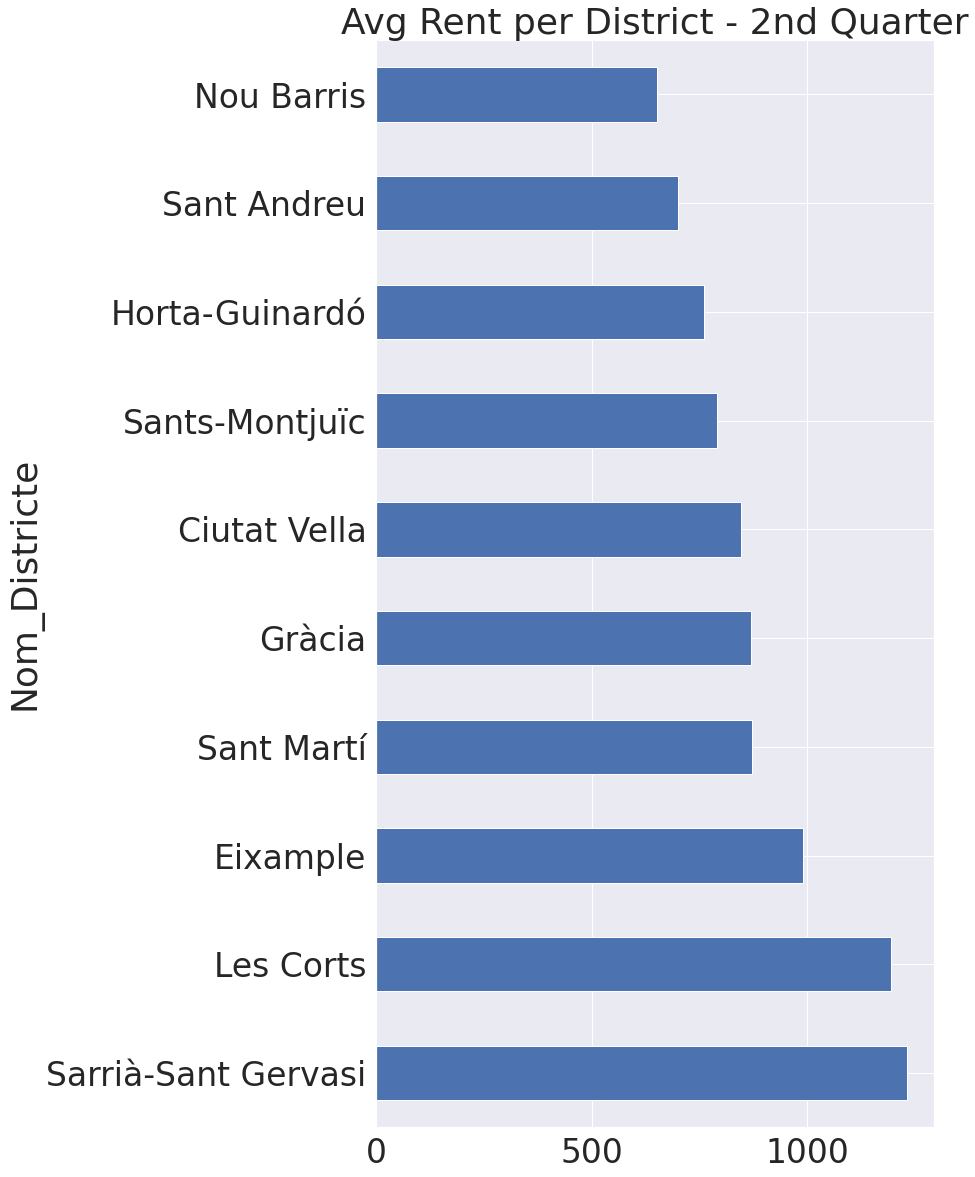

In [211]:
avg_price_T2=T2.groupby('Nom_Districte')['Preu'].mean().sort_values(ascending=False)
avg_price_T2.plot(kind='barh', title='Avg Rent per District - 2nd Quarter')

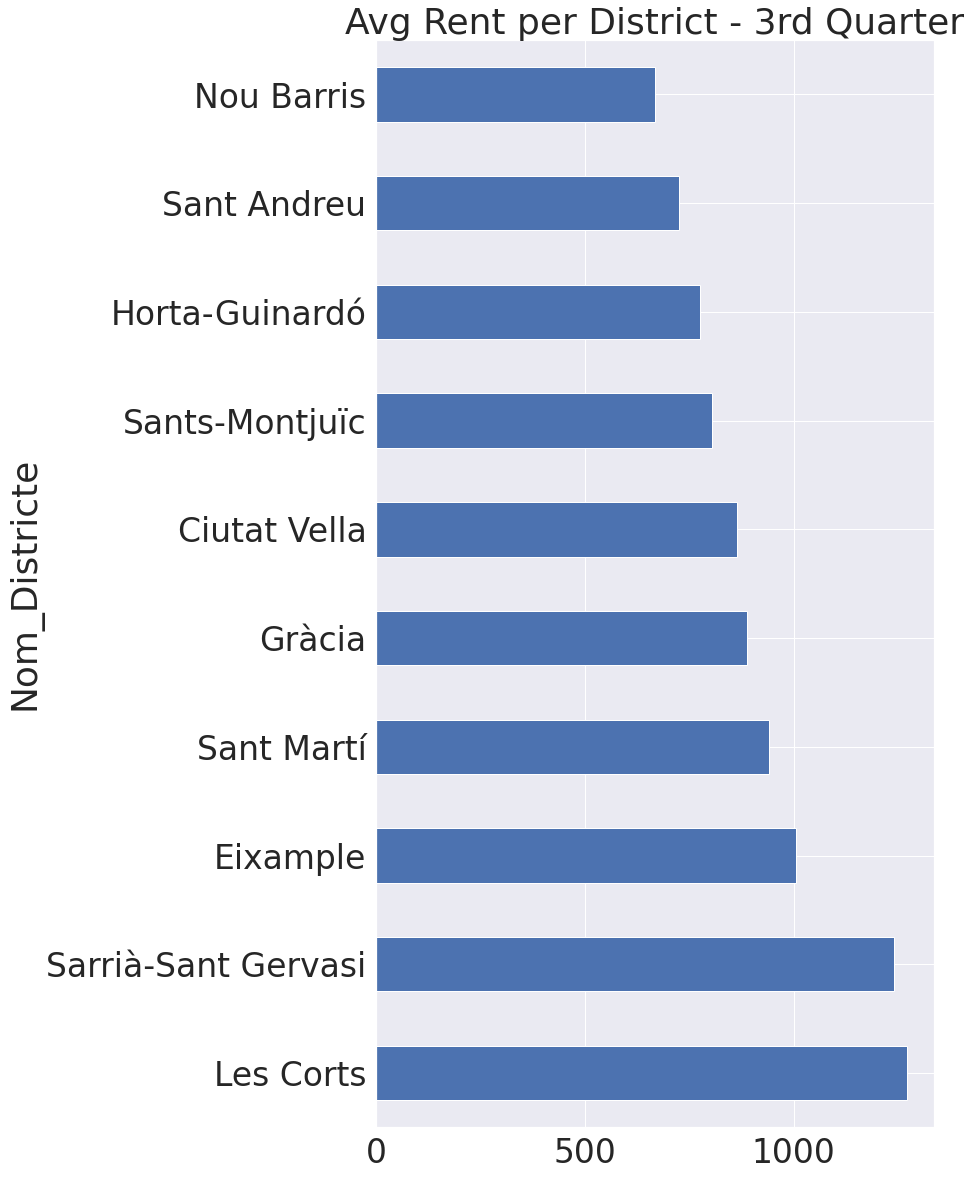

In [212]:
avg_price_T3=T3.groupby('Nom_Districte')['Preu'].mean().sort_values(ascending=False)
avg_price_T3.plot(kind='barh', title='Avg Rent per District - 3rd Quarter')

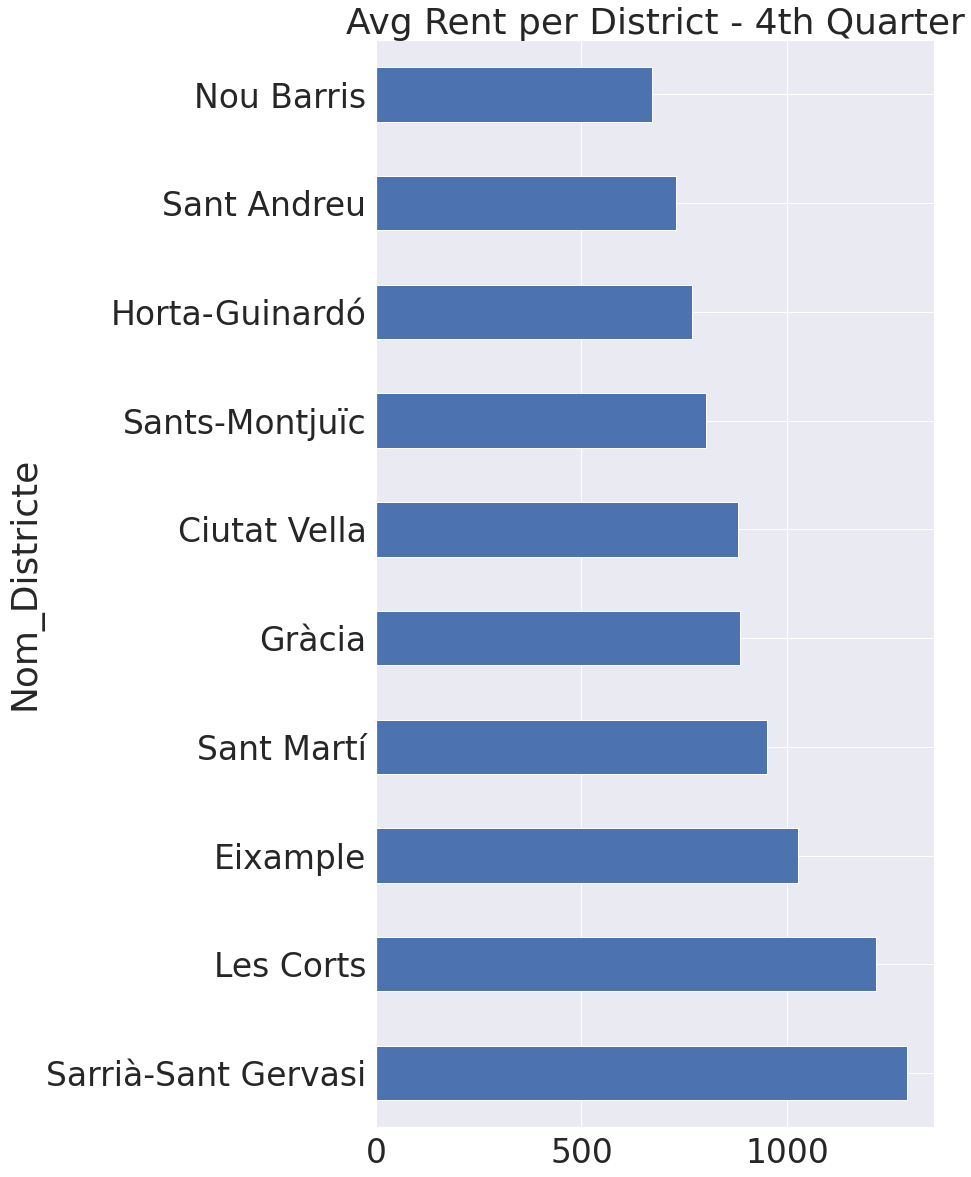

In [213]:
avg_price_T4=T4.groupby('Nom_Districte')['Preu'].mean().sort_values(ascending=False)
avg_price_T4.plot(kind='barh', title='Avg Rent per District - 4th Quarter')


Now we put the 4 quarters together in a barplot to show avg rent per district and quarter

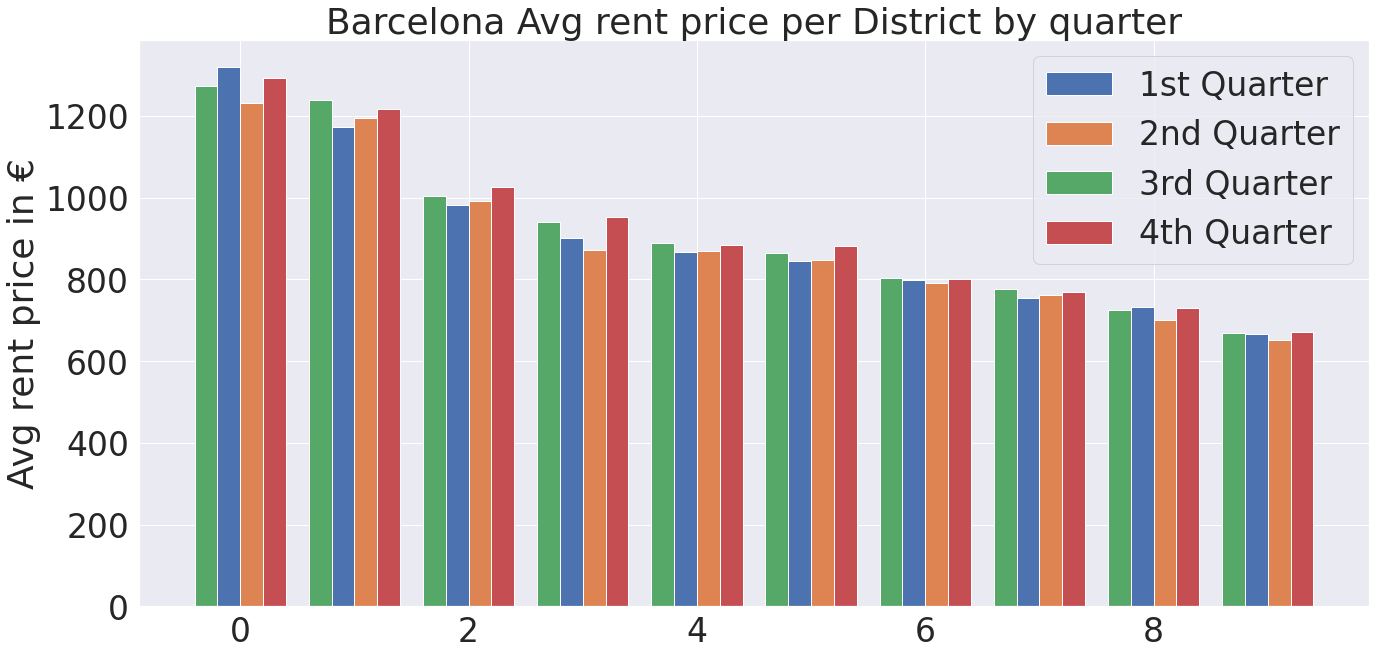

In [214]:
labels = avg_price_T1

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

plt.rcParams["figure.figsize"] = (20,10)
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, avg_price_T1, width, label='1st Quarter')
rects2 = ax.bar(x + width/2, avg_price_T2, width, label='2nd Quarter')
rects3 = ax.bar(x - width*1.5, avg_price_T3, width, label='3rd Quarter')
rects4 = ax.bar(x + width*1.5, avg_price_T4, width, label='4th Quarter')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Avg rent price in €')
ax.set_title('Barcelona Avg rent price per District by quarter')
ax.legend()

#ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

To show a related visualization, column 'Lloguer_mitja' (avg rent) is filtered by 'Lloguer mitjà per superfície (Euros/m2 mes)' and quarter. Then grouped by district name and price to find the average price per district quarterly.

In [215]:
T1=df[(df.Lloguer_mitja == 'Lloguer mitjà per superfície (Euros/m2 mes)') & (df.Trimestre == 1)]
T2=df[(df.Lloguer_mitja == 'Lloguer mitjà per superfície (Euros/m2 mes)') & (df.Trimestre == 2)]
T3=df[(df.Lloguer_mitja == 'Lloguer mitjà per superfície (Euros/m2 mes)') & (df.Trimestre == 3)]
T4=df[(df.Lloguer_mitja == 'Lloguer mitjà per superfície (Euros/m2 mes)') & (df.Trimestre == 4)]

avg_price_per_sq_meter_T1 = T1.groupby('Nom_Districte')['Preu'].mean().sort_values(ascending=False)
avg_price_per_sq_meter_T2= T2.groupby('Nom_Districte')['Preu'].mean().sort_values(ascending=False)
avg_price_per_sq_meter_T3 = T3.groupby('Nom_Districte')['Preu'].mean().sort_values(ascending=False)
avg_price_per_sq_meter_T4 = T4.groupby('Nom_Districte')['Preu'].mean().sort_values(ascending=False)




Plot the filtered variables



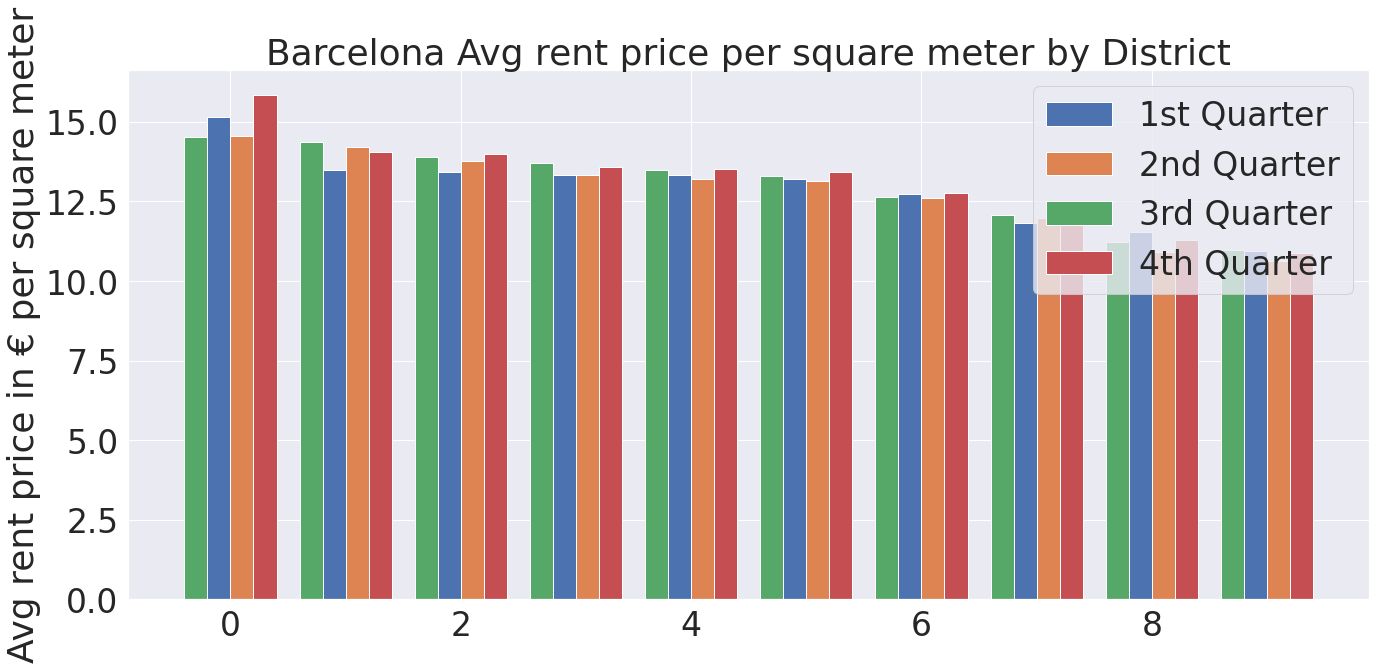

In [216]:
labels = avg_price_T1

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

plt.rcParams["figure.figsize"] = (20,10)
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, avg_price_per_sq_meter_T1, width, label='1st Quarter')
rects2 = ax.bar(x + width/2, avg_price_per_sq_meter_T2, width, label='2nd Quarter')
rects3 = ax.bar(x - width*1.5, avg_price_per_sq_meter_T3, width, label='3rd Quarter')
rects4 = ax.bar(x + width*1.5, avg_price_per_sq_meter_T4, width, label='4th Quarter')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Avg rent price in € per square meter')
ax.set_title('Barcelona Avg rent price per square meter by District')
ax.legend()

#ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()